In [1]:
import os, shutil, sys
SCRIPT_DIR = os.path.dirname(os.path.abspath("__file__"))
sys.path.append(os.path.dirname(SCRIPT_DIR))

from lib.data import data
from lib.file_handler import directories
from lib.model_methods import *
from lib.fin_asset import financial_assets, prediction_comparison, prediction_assessment
from lib.db_utils import SQLite_Query, table_parser
import datetime as dt

# Define current directory and Database subdirectory.

In [2]:
cwd = os.getcwd()
directory = directories(d = cwd)
db_subdir = os.path.join(os.getcwd(), "Databases")
db_subdir = db_subdir.replace('/jupyter', "")

# Data Acquisition from Yahoo Finance

In [3]:
crypto_list = ['XRP-USD', 'BTC-USD', 'ETH-USD', 'ADA-USD', 'TRX-USD']    # Cryptocurrency list.
start_date = dt.datetime(2019, 11, 1) # Approximate pandemic start date.

cryptos = data(start = start_date)    # Initiate crypto class.
cryptos.asset_data(database = 'Pandemic_Cryptos.db', asset_type = 'Cryptocurrency', asset_list = crypto_list,
                today = True) # Get crypto data from Yahoo API.

db_output = directory.contents(dir = cwd, pattern = 'Pandemic_C', extension = '.db') # Find database output.
filename = os.path.basename(db_output)
db_output_fl = os.path.join(db_subdir, filename)
shutil.move(db_output, db_output_fl)    # Move database output to Databases subdirectory.

Connecting to Yahoo Finance...
Fetching XRP-USD Cryptocurrency data...
[*********************100%***********************]  1 of 1 completed
Adding XRP-USD data to Pandemic_Cryptos.db database...
XRP-USD Cryptocurrency data saved!

Fetching BTC-USD Cryptocurrency data...
[*********************100%***********************]  1 of 1 completed
Adding BTC-USD data to Pandemic_Cryptos.db database...
BTC-USD Cryptocurrency data saved!

Fetching ETH-USD Cryptocurrency data...
[*********************100%***********************]  1 of 1 completed
Adding ETH-USD data to Pandemic_Cryptos.db database...
ETH-USD Cryptocurrency data saved!

Fetching ADA-USD Cryptocurrency data...
[*********************100%***********************]  1 of 1 completed
Adding ADA-USD data to Pandemic_Cryptos.db database...
ADA-USD Cryptocurrency data saved!

Fetching TRX-USD Cryptocurrency data...
[*********************100%***********************]  1 of 1 completed
Adding TRX-USD data to Pandemic_Cryptos.db database...
TRX-U

'/Users/christossynodinos/workspace/personal/Market-Analysis/Databases/Pandemic_Cryptos.db'

# SQLite Queries

In [4]:
# Data Query. All SQL tables are added into individual pandas dataframes.
crypto_list_temp = ['XRP_USD', 'BTC_USD', 'ETH_USD', 'ADA_USD', 'TRX_USD']  # Temporary list holds the names of the tables for each cryptocurrency. 

xrp, xrp_dates = SQLite_Query(db_output_fl, crypto_list_temp[0]) 
btc, btc_dates = SQLite_Query(db_output_fl, crypto_list_temp[1])
eth, eth_dates = SQLite_Query(db_output_fl, crypto_list_temp[2])
ada, ada_dates = SQLite_Query(db_output_fl, crypto_list_temp[3])
trx, trx_dates = SQLite_Query(db_output_fl, crypto_list_temp[4])

# Data Preprocessing

In [5]:
pred_days = 60 # number of days used for prediction.

# Tuples with x_train, y_train and scaler data for each asset.
xrp_x_train, xrp_y_train, xrp_scaler = preprocessing(xrp, pred_days)
btc_x_train, btc_y_train, btc_scaler = preprocessing(btc, pred_days) 
eth_x_train, eth_y_train, eth_scaler = preprocessing(eth, pred_days) 
ada_x_train, ada_y_train, ada_scaler = preprocessing(ada, pred_days) 
trx_x_train, trx_y_train, trx_scaler = preprocessing(trx, pred_days) 

crypto = financial_assets(pred_days = pred_days, asset_type = "Cryptocurrency")

# Ripple

Training the model...


2022-07-03 19:55:31.454580: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


[*********************100%***********************]  1 of 1 completed


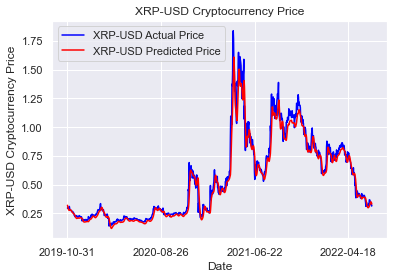

1/1 [==============================] - 1s 881ms/step
XRP-USD Cryptocurrency Adj.Close price prediction for 2022-07-04: $[[0.32003042]]
XRP-USD Cryptocurrency Volatility = 101.86%


/usr/local/lib/python3.9/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [6]:
xrp_all_data, xrp_next, xrp_volatility = crypto.predictor(x = xrp_dates, x_train = xrp_x_train, 
                y_train = xrp_y_train, asset_scaler = xrp_scaler,
                tick = crypto_list[0], query_asset = xrp)

prediction_db = "Prediction_Assessment.db"
table_parser(xrp_all_data, dbname = prediction_db, asset_n = crypto_list_temp[0])
prediction_assessment(df = xrp_all_data, db = prediction_db, asset = crypto_list_temp[0])


# Bitcoin

In [ ]:
crypto.predictor(x_train = btc_x_train, y_train = btc_y_train, asset_scaler = btc_scaler,
                tick = crypto_list[1], query_asset = btc)

# Ethereum

In [ ]:
crypto.predictor(x_train = eth_x_train, y_train = eth_y_train, asset_scaler = eth_scaler,
                tick = crypto_list[2], query_asset = eth)

# Cardano

In [ ]:
crypto.predictor(x_train = ada_x_train, y_train = ada_y_train, asset_scaler = ada_scaler,
                tick = crypto_list[3], query_asset = ada)

# Tron

In [ ]:
crypto.predictor(x_train = trx_x_train, y_train = trx_y_train, asset_scaler = trx_scaler,
                tick = crypto_list[4], query_asset = trx)